# Лабораторная работа №3

ФИО:   Людофа Елена Анатольевна

Группа: БИВТ-23-СП-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1NOE0D4JQgD6LbvUqWboUI1TFj4P87ugbqUTDquxlGEI/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1sbsjBsJ_ln0XgXCI9R6s17pvyvApgcwF?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`)
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [19]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')  # если нужно, можно поменять разделитель

## 2. Понимаем, какая перед нами задача

In [20]:
"""
Целевая переменная: Response — бинарная (0/1)

Задача бинарной классификации
"""

'\nЦелевая переменная: Response — бинарная (0/1)\n\nЗадача бинарной классификации\n'

## 3. Делаем предобработку данных

In [21]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [22]:
X = data.drop(columns=['Response'])
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=61,
    stratify=y
)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='median')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = cat_imputer.fit_transform(X_train[cat_cols])
X_test[cat_cols] = cat_imputer.transform(X_test[cat_cols])

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

X_train_cat = pd.DataFrame(
    X_train_cat,
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    X_test_cat,
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_test.index
)

# te = TargetEncoder(cols=cat_cols)

# X_train_cat = te.fit_transform(X_train[cat_cols], y_train)
# X_test_cat = te.transform(X_test[cat_cols])

X_train_final = pd.concat([X_train[num_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test_cat], axis=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

## 4 и 5. Обучение и метрики

In [23]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    roc_curve
)
import matplotlib.pyplot as plt

In [24]:
def print_classification_metrics(y_true, y_pred, y_proba, model_name):
    print(model_name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=47
)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

print_classification_metrics(y_test, y_pred_lr, y_proba_lr, "LogisticRegression")

LogisticRegression
Accuracy: 0.8258928571428571
F1-score: 0.5063291139240507
ROC-AUC: 0.851975249881009


In [26]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt.fit(X_train_scaled, y_train)

y_pred_dt = dt.predict(X_test_scaled)
y_proba_dt = dt.predict_proba(X_test_scaled)[:, 1]

print_classification_metrics(y_test, y_pred_dt, y_proba_dt, "DecisionTreeClassifier")


DecisionTreeClassifier
Accuracy: 0.875
F1-score: 0.48148148148148145
ROC-AUC: 0.7682056163731554


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=4,
    metric='manhattan',
    weights='distance'
    )
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

print_classification_metrics(y_test, y_pred_knn, y_proba_knn, "KNN")

KNN
Accuracy: 0.8526785714285714
F1-score: 0.4
ROC-AUC: 0.7189433603046168


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=11,
    random_state=55,
    class_weight='balanced'
)

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

print_classification_metrics(y_test, y_pred_rf, y_proba_rf, "RandomForestClassifier")

RandomForestClassifier
Accuracy: 0.8883928571428571
F1-score: 0.6268656716417911
ROC-AUC: 0.8983023956845946


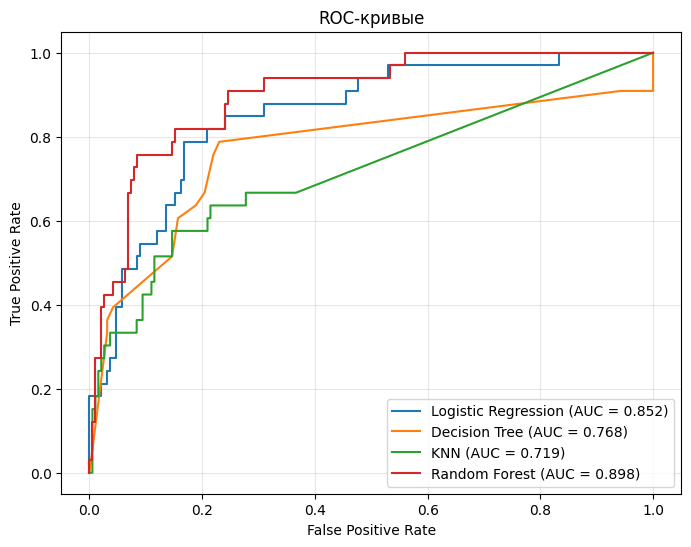

In [29]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


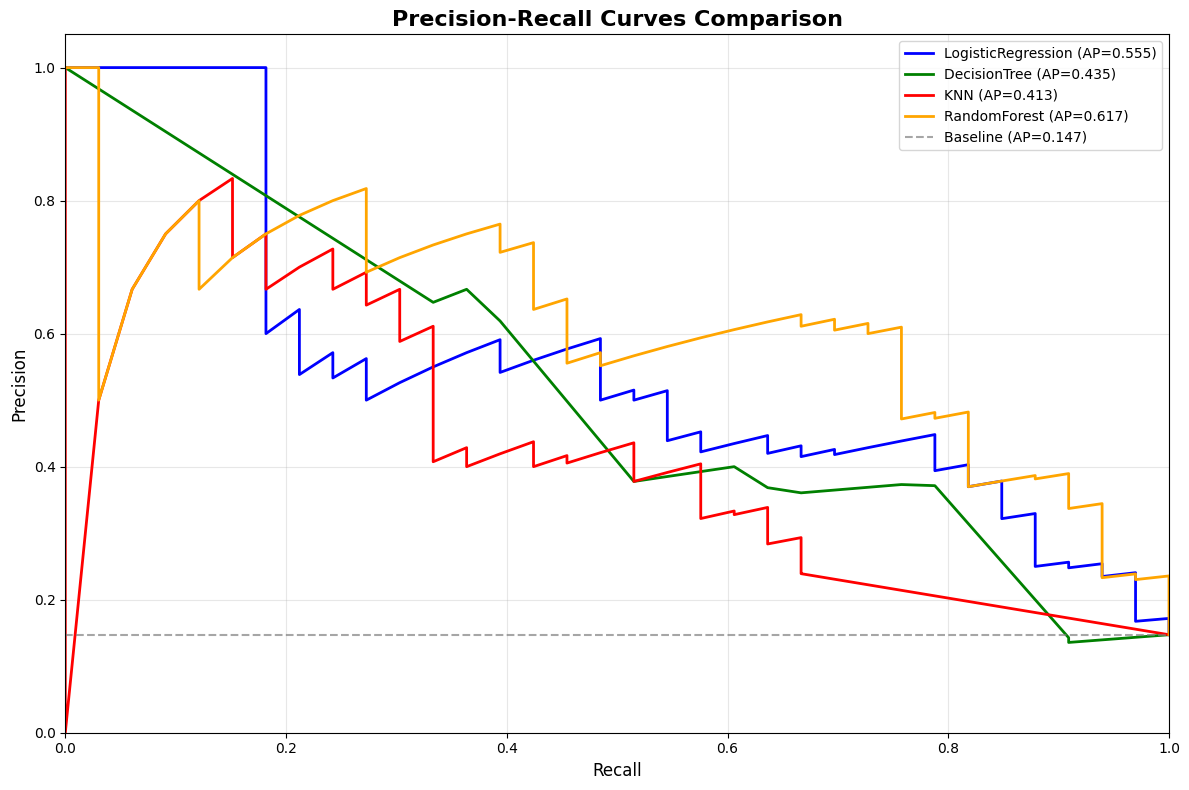

In [30]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

models = {
    'LogisticRegression': (y_proba_lr, 'blue'),
    'DecisionTree': (y_proba_dt, 'green'),
    'KNN': (y_proba_knn, 'red'),
    'RandomForest': (y_proba_rf, 'orange')
}

no_skill = len(y_test[y_test==1]) / len(y_test)

for model_name, (y_proba, color) in models.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)

    plt.plot(recall, precision,
             color=color,
             linewidth=2,
             label=f'{model_name} (AP={ap:.3f})')

plt.axhline(y=no_skill, color='gray', linestyle='--',
            label=f'Baseline (AP={no_skill:.3f})', alpha=0.7)

plt.title('Precision-Recall Curves Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='best', fontsize=10)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.tight_layout()

plt.show()

In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

def calculate_all_metrics(y_true, y_pred, y_proba, model_name):
    return {
        'Model': model_name,
        'Accuracy': f'{accuracy_score(y_true, y_pred):.4f}',
        'ROC-AUC': f'{roc_auc_score(y_true, y_proba):.4f}',
        'F1-Score': f'{f1_score(y_true, y_pred):.4f}'
    }

metrics_data = []

models_info = [
    ('LogisticRegression', y_pred_lr, y_proba_lr),
    ('DecisionTree', y_pred_dt, y_proba_dt),
    ('KNN', y_pred_knn, y_proba_knn),
    ('RandomForest', y_pred_rf, y_proba_rf)
]

for name, y_pred, y_proba in models_info:
    metrics_data.append(calculate_all_metrics(y_test, y_pred, y_proba, name))

metrics_df = pd.DataFrame(metrics_data)

print("=" * 60)
print("СРАВНЕНИЕ МОДЕЛЕЙ: Accuracy, ROC-AUC, F1-Score")
print("=" * 60)
print(metrics_df.to_string(index=False))
print("=" * 60)

metrics_df_sorted = metrics_df.copy()
metrics_df_sorted['F1-Score_num'] = metrics_df_sorted['F1-Score'].astype(float)
metrics_df_sorted = metrics_df_sorted.sort_values('F1-Score_num', ascending=False).drop('F1-Score_num', axis=1)

СРАВНЕНИЕ МОДЕЛЕЙ: Accuracy, ROC-AUC, F1-Score
             Model Accuracy ROC-AUC F1-Score
LogisticRegression   0.8259  0.8520   0.5063
      DecisionTree   0.8750  0.7682   0.4815
               KNN   0.8527  0.7189   0.4000
      RandomForest   0.8884  0.8983   0.6269


In [32]:
'''
лучше всего справился RandomForestClassifier
'''

'\nлучше всего справился RandomForestClassifier\n'